https://github.com/nicknochnack/ActionDetectionforSignLanguage/blob/main/Action%20Detection%20Refined.ipynb - REFERENCE

# 1. IMPORT AND INSTALL DEPENDENCIES

In [1]:
pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tkinter import Tk
from tkinter.filedialog import askopenfilename, askdirectory

# 2. KEYPOINTS USING MP HOLISTIC

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB to BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # if results.face_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    #         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    #         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #     )
    # if results.pose_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
    #         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #     )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [5]:
def draw_styled_landmarks(image, results):
    # # Check and draw face landmarks with styling
    # if results.face_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    #         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    #         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #     )
    # # Check and draw pose landmarks with styling
    # if results.pose_landmarks:
    #     mp_drawing.draw_landmarks(
    #         image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
    #         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #     )
    # Check and draw left hand landmarks with styling
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    # Check and draw right hand landmarks with styling
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model, STOP THIS CELL when you're done and want to capture
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

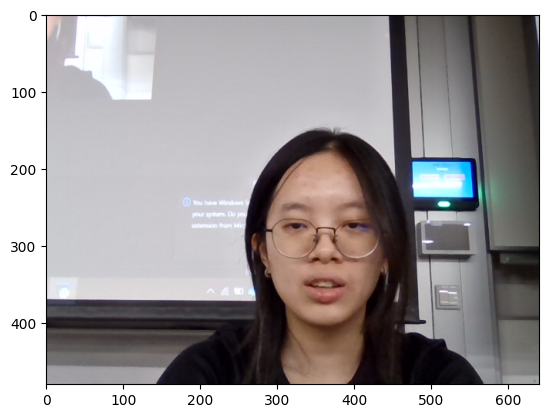

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. EXTRACT KEYPOINT VALUES

In [11]:
len(results.right_hand_landmarks.landmark)

#this line of code actually depends on which hand youre holding up in the frame frozen, if no left hand, value = nonetype

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [30]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [29]:
def extract_keypoints(results):
    # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # return np.concatenate([pose, face, lh, rh])
    return np.concatenate([ lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.54875779,  0.44824842, -0.5386709 , ...,  0.35466287,
        0.6598599 , -0.06525168])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.54875779,  0.44824842, -0.5386709 , ...,  0.35466287,
        0.6598599 , -0.06525168])

# 4. SETUP FOLDERS FOR COLLECTION

In [9]:
directory = './MP_Data'
foldernames = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

actions = np.array(foldernames)
print(actions)

['drink' 'eat' 'food' 'hello' 'how-are-you' 'im-fine' 'nice-to-meet-you'
 'please' 'sorry' 'take-care' 'teach' 'thank-you' 'very' 'well' 'whats-up'
 'whats-your-name' 'where-are-you-from' 'you']


In [10]:
# Define the path for the MP_Data directory relative to the current directory (to store the dataset)
DATA_PATH = os.path.join(os.getcwd(), 'MP_Data')

# Check if the directory already exists. If not, create it.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    message = f"Directory '{DATA_PATH}' was created."
else:
    message = f"Directory '{DATA_PATH}' already exists."
message

"Directory 'c:\\Github\\asl-miners\\asl-lstm-model-test\\MP_Data' already exists."

In [11]:
# Thirty videos worth of data - adjust accordingly
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30  # Starting index for the new folders to be created

# 6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'drink': 0,
 'eat': 1,
 'food': 2,
 'hello': 3,
 'how-are-you': 4,
 'im-fine': 5,
 'nice-to-meet-you': 6,
 'please': 7,
 'sorry': 8,
 'take-care': 9,
 'teach': 10,
 'thank-you': 11,
 'very': 12,
 'well': 13,
 'whats-up': 14,
 'whats-your-name': 15,
 'where-are-you-from': 16,
 'you': 17}

In [15]:
sequences, labels = [], []

DATA_PATH = 'MP_Data'
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
np.array(sequences).shape

(1058, 30, 126)

In [17]:
np.array(labels).shape

(1058,)

In [18]:
X = np.array(sequences)

In [19]:
X.shape

(1058, 30, 126)

In [20]:
y = to_categorical(labels).astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [22]:
y_test.shape

(318, 18)

# 7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [24]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [33]:
model.load_weights('action7030.h5')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 18)                594       
                                                                 
Total params: 203,954
Trainable params: 203,954
Non-tr

# 8. MAKE PREDICTIONS

In [35]:
res = model.predict(X_test)

10/10 [==============================] - 1s 10ms/step


In [36]:
actions[np.argmax(res[4])]

'very'

In [37]:
actions[np.argmax(y_test[4])]

'very'

# 10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [43]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [44]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  1],
        [ 0, 17]],

       [[54,  0],
        [ 0, 17]],

       [[52,  0],
        [ 0, 19]],

       [[53,  0],
        [ 1, 17]]], dtype=int64)

In [47]:
accuracy_score(ytrue, yhat)

0.9859154929577465

# 11. TEST IN REAL TIME

In [38]:
from scipy import stats

In [39]:
import cv2
import numpy as np

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Ensure that we're getting the last set of probabilities as a list or array
    latest_probs = res[-1].tolist() if isinstance(res[-1], np.ndarray) else [res[-1]]

    for num, prob in enumerate(latest_probs):
        color = colors[num % len(colors)]
        bar_width = max(int(prob * 100), 0)
        cv2.rectangle(output_frame, (0, 60 + num * 40), (bar_width, 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame


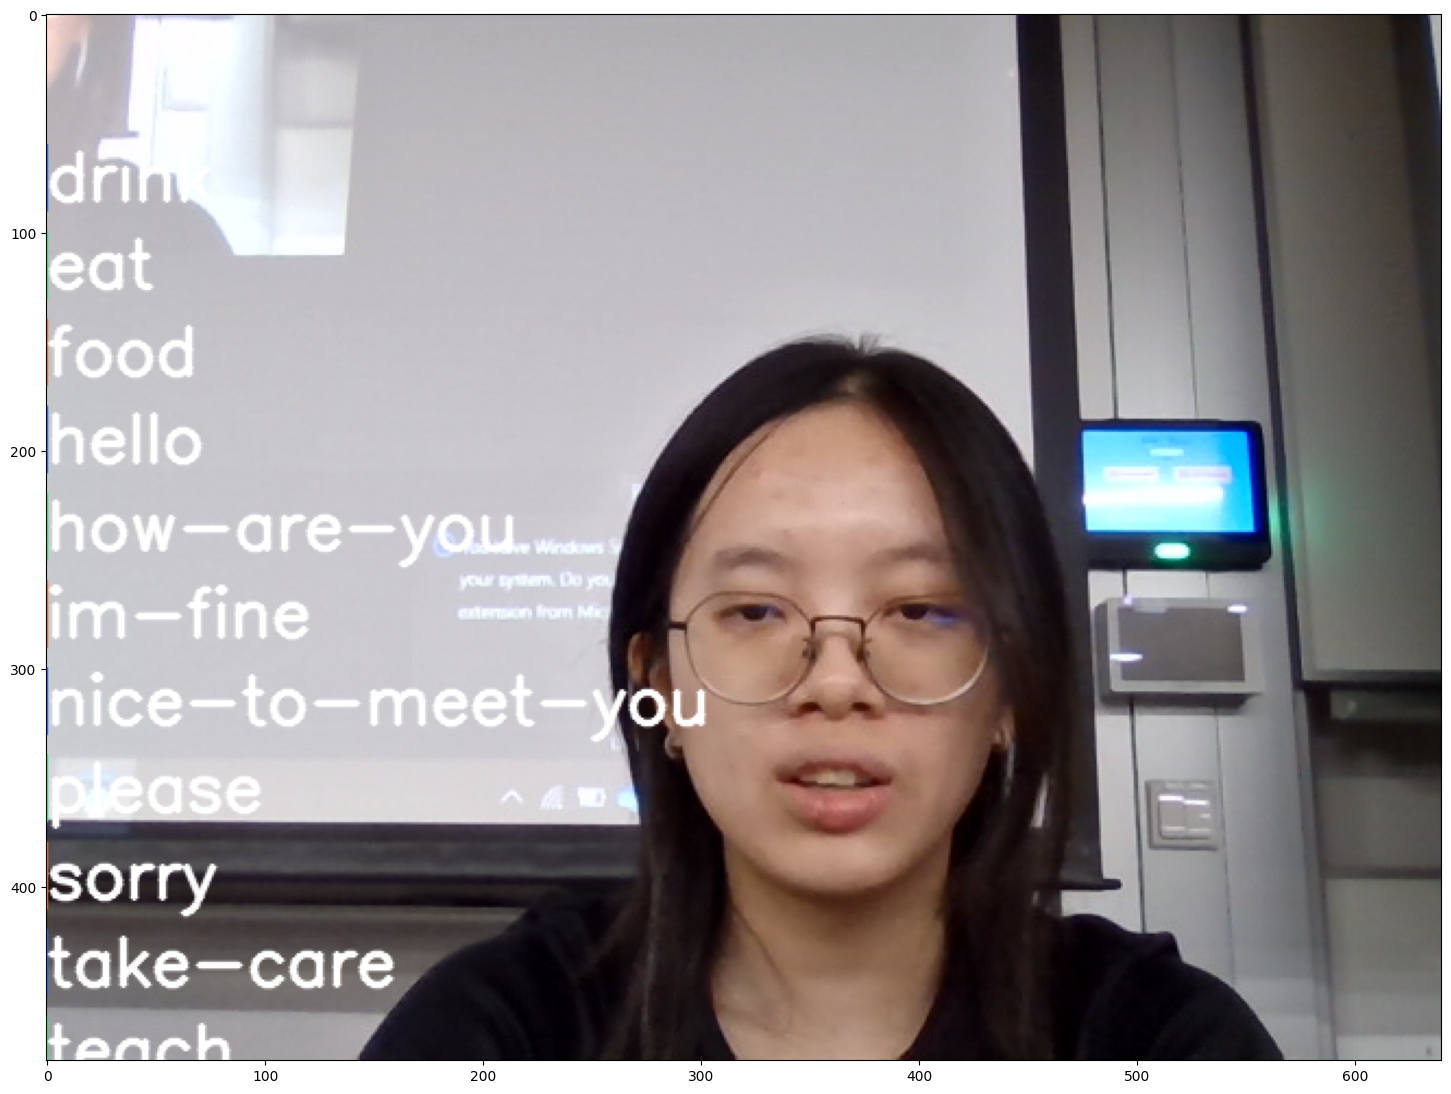

In [40]:
plt.figure(figsize=(18,18))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.show()


In [41]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti